## 1. Постановка задачи:

Анализ данных пассажиров, выживших на Титанике, чтобы выявить факторы, которые могли повлиять на их шансы на выживание.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Чтение данных из CSV-файла

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 2. Предварительный анализ данных:

- Исследование структуры данных (колонки, типы данных, наличие пропущенных значений).
- Первичная статистика по ключевым переменным (возраст, пол, класс каюты и т.д.).

In [4]:
# Отображаем основную информацию о датасете и первые несколько строк данных 

df.info()  # Вывод информации о структуре данных (типы данных, количество записей и пропущенных значений)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [5]:
df.head()  # Отображение первых нескольких строк датасета для первичного ознакомления

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Данные загружены, и вот некоторая информация о них:

   #### - Основная информация:
- В датасете 891 запись и 16 столбцов.
- Некоторые столбцы содержат пропущенные значения:
    - age (возраст) имеет 714 заполненных значений из 891.
    - deck (палуба) имеет только 203 заполненных значения.
    - embarked и embark_town имеют 889 заполненных значений.

#### - Основные столбцы:
- survived: Переменная показывает, выжил ли пассажир (1) или нет (0).
- pclass: Класс каюты (1 - первый класс, 2 - второй, 3 - третий).
- sex: Пол пассажира.
- age: Возраст пассажира.
- sibsp: Количество братьев, сестер и супругов на борту.
- parch: Количество родителей и детей на борту.
- fare: Тариф, уплаченный за билет.
- embarked: Порт посадки (C - Cherbourg, Q - Queenstown, S - Southampton).
- who: Категория человека (man, woman, child).
- adult_male: Булево значение, указывающее, является ли пассажир взрослым мужчиной.
- deck: Палуба, на которой находился пассажир.
- alive: Переменная, указывающая, остался ли пассажир в живых ("yes" или "no").
- alone: Указывает, путешествовал ли пассажир в одиночку.

## Следующие шаги:
1. Обработаем пропущенные значения, особенно в столбцах age и embarked.
2. Проанализируем ключевые факторы, влияющие на выживаемость пассажиров.
3. Построим визуализации и модели для выявления зависимостей.

### Заполнение пустых значений

In [6]:
df['age'].fillna(df['age'].median(), inplace=True) # Заполняем пропуски в возрасте медианным значением
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) # Заполняем пропуски в порту посадки самым частым значением

In [7]:
df['deck'] = df['deck'].fillna('Unknown') # Заполняем пропуски в 'deck' на 'Unknown'

In [8]:
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True


#### Начнем с анализа данных о выживаемости по основным факторам (возраст, пол, класс), а затем построим модели линейной и логистической регрессии.

### Анализ выживаемости в зависимости от пола

In [9]:
# Группировка данных по полу, выживаемости и подсчет количества пассажиров 
survivors_by_gender = df.groupby(['survived', 'sex']).size().reset_index(name='passenger_count')

In [10]:
survivors_by_gender

,survived,sex,passenger_count
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


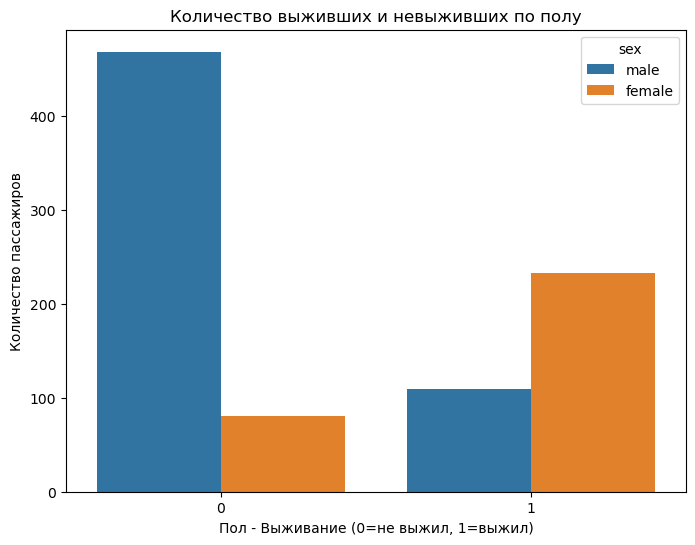

In [11]:
# Визуализация распределения выживших и невыживших по полу
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', hue='sex', data=df)
plt.xlabel('Пол - Выживание (0=не выжил, 1=выжил)')
plt.ylabel('Количество пассажиров')
plt.title('Количество выживших и невыживших по полу')
plt.show()

- Тип визуализации:

Я использовала sns.countplot для автоматического построения столбчатой диаграммы, где на оси X отображается переменная survived (выживание), а переменная sex (пол) отображается через цветовую палитру.
Это простая и стандартная визуализация для отображения количества выживших и невыживших по полу.

- Ось X:

Ось X содержит всего два значения — 0 (не выжил) и 1 (выжил), а столбцы разделены по полу (через параметр hue='sex').

- Цветовая схема:

Мой код использует стандартную цветовую палитру из seaborn, которая автоматически присваивает разные цвета для каждого пола.

- Гибкость и настройка:

Меньше настроек — все автоматически управляется библиотекой seaborn. Это быстрый и удобный способ визуализации.


### Анализ выживаемости в зависимости от класса

In [12]:
# Группировка данных по классу пассажира, выживаемости и подсчет количества пассажиров 
survivors_by_class = df.groupby(['survived', 'pclass']).size().reset_index(name='passenger_count')

In [13]:
survivors_by_class

,survived,pclass,passenger_count
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


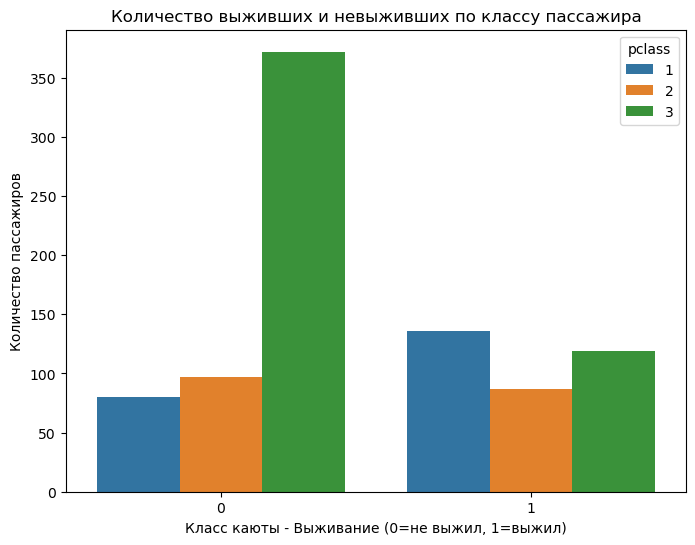

In [14]:
# Визуализация влияния класса каюты на выживаемость
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', hue='pclass', data=df)
plt.xlabel('Класс каюты - Выживание (0=не выжил, 1=выжил)')
plt.ylabel('Количество пассажиров')
plt.title('Количество выживших и невыживших по классу пассажира')
plt.show()

### Анализ выживаемости в зависимости от возраста

In [15]:
df.groupby(['survived', 'age']).size().reset_index(name='passenger_count')

,survived,age,passenger_count
0,0,1.0,2
1,0,2.0,7
2,0,3.0,1
3,0,4.0,3
4,0,6.0,1
...,...,...,...
137,1,58.0,3
138,1,60.0,2
139,1,62.0,2
140,1,63.0,2


In [16]:
df[df['survived'] == 1].groupby('age').size().idxmax()

28.0

In [17]:
df[df['survived'] == 0].groupby('age').size().idxmax()

28.0

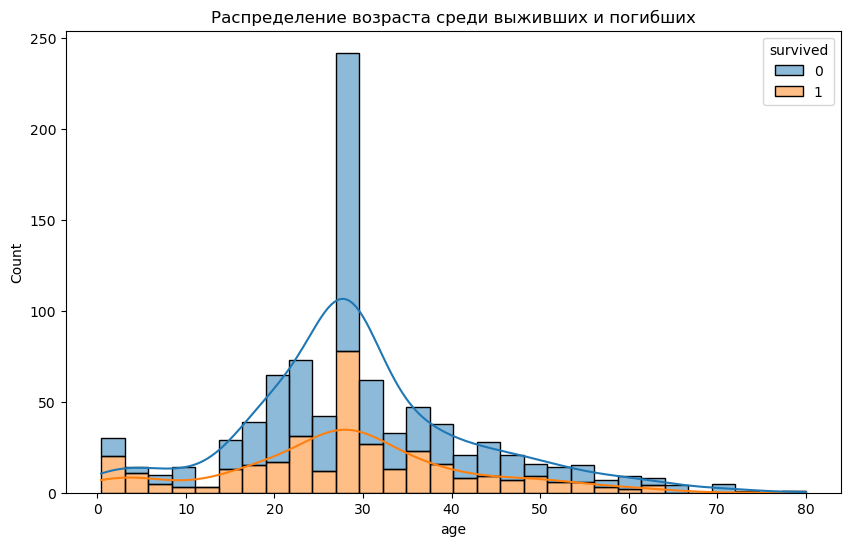

In [18]:
# Визуализация распределения возраста среди выживших и погибших
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='survived', multiple='stack', kde=True)
plt.title('Распределение возраста среди выживших и погибших')
plt.show()


Я провела предварительный анализ данных и получили следующие визуализации:

- Выживаемость по полу:

Женщины имели значительно больше шансов на выживание по сравнению с мужчинами. Это видно из того, что доля выживших среди женщин выше. Это можно объяснить правилами эвакуации "женщины и дети первыми".
- Выживаемость по классу:

Пассажиры первого класса имели наибольшие шансы на выживание, в то время как пассажиры третьего класса выживали реже всего. Это связано с тем, что у пассажиров первого класса было больше доступа к спасательным средствам и они находились ближе к палубам.
- Распределение возраста среди выживших и погибших:

Большая часть выживших приходится на пассажиров младшего и среднего возраста. Однако и среди пожилых пассажиров тоже есть выжившие.



### Построение модели линейной регрессии
Попробуем предсказать шансы на выживание с помощью линейной регрессии, хотя она больше подходит для непрерывных данных.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Подготовка данных для модели
X = df[['pclass', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

# Обработка пропусков
X.loc[:, 'age'] = X['age'].fillna(X['age'].median())

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.1869278524055185


C:\Users\User\AppData\Local\Temp\ipykernel_20096\3619774065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'age'] = X['age'].fillna(X['age'].median())


1. Mean Squared Error (MSE): Ваш MSE равен 0.1869. Этот показатель оценивает, насколько близки предсказанные значения к фактическим. Чем меньше значение MSE, тем лучше модель предсказывает данные. Однако само по себе значение MSE не дает полной картины о том, насколько хорошо модель работает, так как не нормализовано и зависит от диапазона значений целевой переменной. Для дополнительной оценки можно было бы использовать другие метрики, такие как R² (коэффициент детерминации).

2. Линейная регрессия для бинарного признака (survived): Модель линейной регрессии не совсем подходящая для задачи бинарной классификации (выживание, где значения принимают только 0 или 1). Логистическая регрессия лучше подходит для этой задачи, так как она прогнозирует вероятность принадлежности к одному из классов. Линейная регрессия может давать значения предсказаний, выходящие за диапазон [0,1], что не имеет смысла для данной задачи.

### Построение модели логистической регрессии
Логистическая регрессия для бинарных данных, таких как предсказание выживаемости.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Модель логистической регрессии
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Прогнозирование
y_log_pred = log_model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_log_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7318435754189944


Мой результат показывает, что точность модели логистической регрессии составляет 73.18%. Это означает, что модель правильно предсказала 73.18% наблюдений на тестовой выборке.

Что можно сказать по этому результату:

- Средняя точность: Точность модели выше случайного угадывания (50% для бинарной классификации), что говорит о том, что модель способна находить закономерности в данных. Однако, для задачи с неравномерными классами (например, больше людей не выжило, чем выжило на "Титанике") этого может быть недостаточно, так как модель может предсказывать большинство классов (например, что люди не выжили) и получать высокую точность, игнорируя редкие случаи (выживание).

- Необходимы другие метрики: Точность (accuracy) не всегда является лучшей метрикой, особенно если классы несбалансированы. 